In [1]:
import eland as ed
import numpy as np
import matplotlib.pyplot as plt
import os

from elasticsearch import Elasticsearch
from dotenv import load_dotenv
from notebooks.backtesting_utils import get_cci

os.chdir("..")
load_dotenv()

True

In [2]:
es_url = os.environ.get('ELASTICSEARCH_URL')
es_api_key = os.environ.get('ELASTICSEARCH_API_KEY')
es = Elasticsearch(hosts=[f"{es_url}"], api_key=es_api_key)

In [3]:
%%capture
ticker="NVDA"
df_eod = ed.DataFrame(es, es_index_pattern="quant-agents_stocks-eod_*")
df_eod = df_eod[(df_eod.key_ticker == ticker)]
df_cci = ed.eland_to_pandas(df_eod).sort_values(by='date_reference', ascending=True).tail(100).set_index('date_reference')

period = 14
df_cci, df_crossovers = get_cci(df_cci, period)

In [4]:
df_cci.tail()

,key_ticker,val_close,val_high,val_low,val_open,val_volume,tp,atp,dev,md,cci,position,returns,strategy
date_reference,,,,,,,,,,,,,,
2025-10-20,NVDA,182.64,185.200,181.7300,183.130,128544711,183.190000,185.768093,2.578093,5.276133,-32.575536,1,-0.003171,-0.003171
2025-10-21,NVDA,181.16,182.785,179.8000,182.785,124240168,181.248333,185.398212,4.149879,5.004262,-55.284585,1,-0.008136,-0.008136
2025-10-22,NVDA,180.28,183.440,176.7600,181.140,162249552,180.160000,184.742974,4.582974,4.615462,-66.197404,1,-0.004869,-0.004869
2025-10-23,NVDA,182.16,183.030,179.7901,180.420,111363718,181.660033,184.305357,2.645324,4.253581,-41.460345,1,0.010374,0.010374
2025-10-24,NVDA,186.26,187.470,183.5000,183.835,131296677,185.743333,184.332262,1.411071,4.026294,23.364274,1,0.022258,0.022258


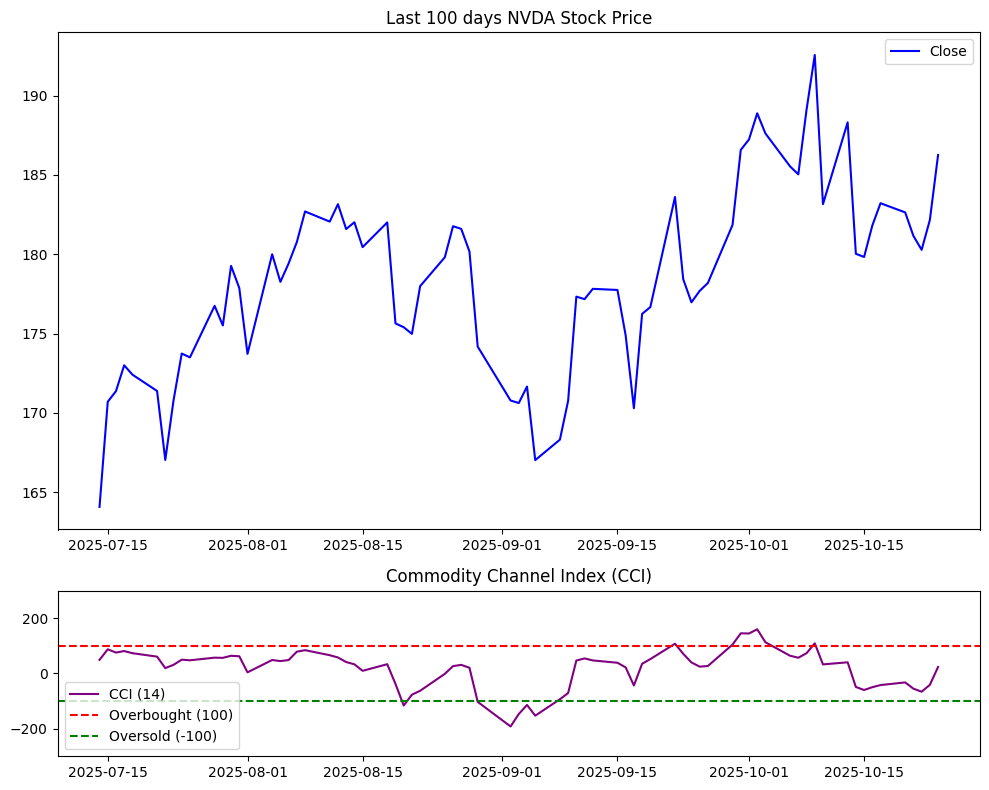

In [5]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

# Top: Price plot
axs[0].plot(df_cci.index, df_cci['val_close'], label='Close', color='blue')
axs[0].set_title(f"Last 100 days {ticker} Stock Price")
axs[0].legend()

# Bottom: CCI plot
axs[1].plot(df_cci.index, df_cci['cci'], label=f"CCI ({period})", color='purple')
axs[1].axhline(100, color='red', linestyle='--', label='Overbought (100)')
axs[1].axhline(-100, color='green', linestyle='--', label='Oversold (-100)')
axs[1].set_title('Commodity Channel Index (CCI)')
axs[1].legend()
axs[1].set_ylim(-300, 300)  # Adjust for typical CCI range visibility

plt.tight_layout()
plt.show()

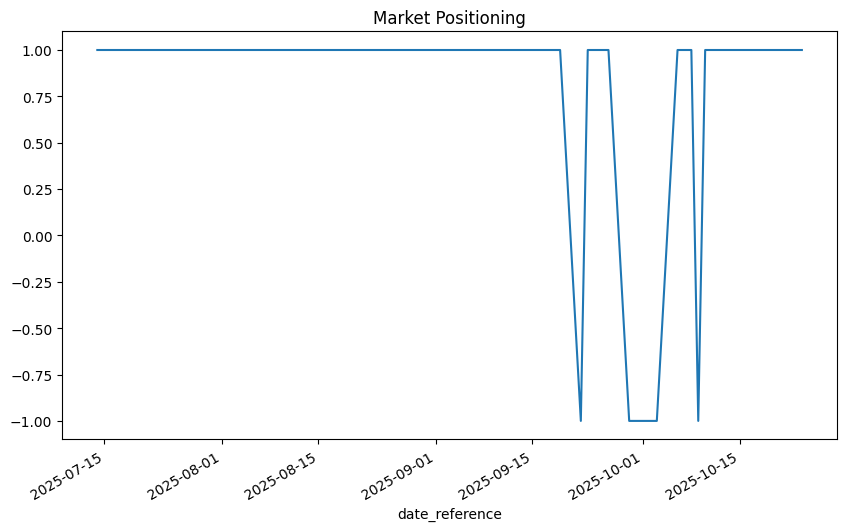

In [6]:
df_cci['position'].plot(
    ylim=[-1.1, 1.1],
    title='Market Positioning',
    figsize=(10, 6)
);

In [7]:
df_cci[['returns', 'strategy']].sum().apply(np.exp)

returns     1.129396
strategy    1.269903
dtype: float64

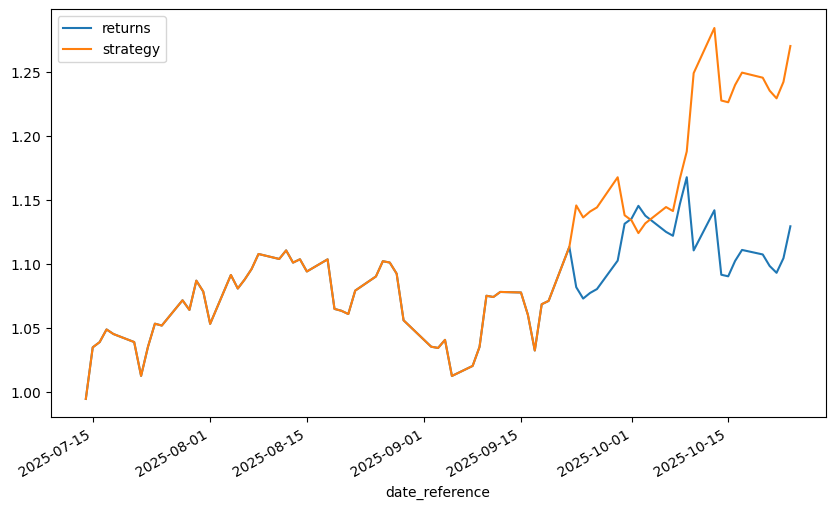

In [8]:
df_cci[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

In [9]:
df_crossovers[['val_close', 'cci', 'position']]

,val_close,cci,position
date_reference,,,
2025-09-22,183.61,107.472095,-1
2025-09-23,178.43,71.098741,1
2025-09-29,181.85,104.464958,-1
2025-10-06,185.54,63.942613,1
2025-10-09,192.57,108.840734,-1
2025-10-10,183.16,32.647188,1
